# Universidad Politécnica Salesiana
## Autor Yandry Romero

In [46]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Paso de parametros para las graficas a traves de papermill

In [47]:
fecha_inicio='2021-01-01'
fecha_fin='2021-05-07'

In [48]:
vacunas = pd.read_csv('C:/Users/USUARIO/Documents/Simulación/Prueba1/in/vacunas/vacunas.csv')
vacunas['fecha']= pd.to_datetime(vacunas['fecha'],format='%d/%m/%Y')
vacunas = vacunas[(vacunas['fecha']>=fecha_inicio)&(vacunas['fecha']<=fecha_fin)]
vacunas.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,2021-01-21,0,0,0
1,2021-01-22,108,108,0
2,2021-01-27,2982,2982,0
3,2021-02-04,6228,6228,0
4,2021-02-17,8190,6228,1962


# Gráficos

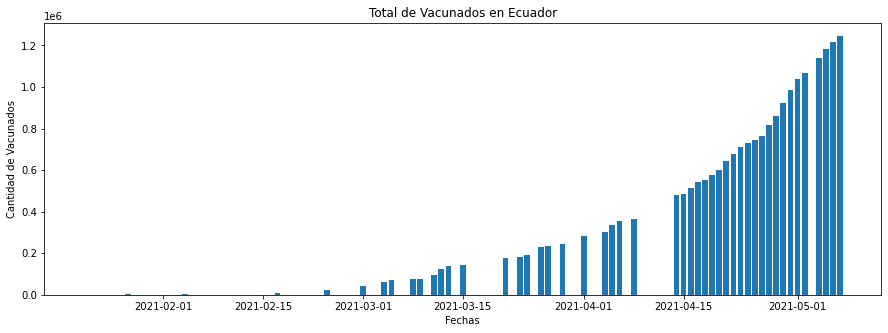

In [49]:
fechas=vacunas['fecha']
cantidad=vacunas['dosis_total']
plt.figure(figsize=(15, 5))
plt.xlabel("Fechas")
plt.ylabel("Cantidad de Vacunados")
plt.title('Total de Vacunados en Ecuador')
plt.bar(fechas,cantidad)
plt.show()

In [50]:
fabricantes = pd.read_csv('C:/Users/USUARIO/Documents/Simulación/Prueba1/in/vacunas/fabricantes.csv')
fabricantes['arrived_at']= pd.to_datetime(fabricantes['arrived_at'],format='%d/%m/%Y')
fabricantess = fabricantes[(fabricantes['arrived_at']>=fecha_inicio)&(fabricantes['arrived_at']<=fecha_fin)]
fabricantes.head()

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,2021-01-20
1,Pfizer/BioNTech,16380,2021-02-17
2,Pfizer/BioNTech,17550,2021-02-24
3,Pfizer/BioNTech,31590,2021-03-03
4,Sinovac,20000,2021-03-06


In [51]:
porcentaje = fabricantes.groupby(['vaccine'])[['total']].sum()
porcentaje['porcentaje']=(porcentaje['total']/porcentaje['total'].sum())*100
porcentaje

,total,porcentaje
vaccine,,
Oxford/AstraZeneca,420000,20.001143
Pfizer/BioNTech,659880,31.424653
Sinovac,1020000,48.574204


In [52]:
porcentaje.reset_index(inplace=True)
fig = px.pie(porcentaje, values="porcentaje",names = "vaccine",
               color_discrete_sequence=['blue','red','black'],
               width= 700,height=400)
fig.update_layout(title_text='Gráfico de Pie de Fabricante de Vacuna',title_x=0.5)
fig.show()

In [53]:
suma=fabricantes.groupby(['vaccine',pd.Grouper(key='arrived_at',freq='M')])[['total']].sum()
suma.reset_index(inplace=True)
suma

,vaccine,arrived_at,total
0,Oxford/AstraZeneca,2021-03-31,84000
1,Oxford/AstraZeneca,2021-04-30,336000
2,Pfizer/BioNTech,2021-01-31,8190
3,Pfizer/BioNTech,2021-02-28,33930
4,Pfizer/BioNTech,2021-03-31,299520
5,Pfizer/BioNTech,2021-04-30,217620
6,Pfizer/BioNTech,2021-05-31,100620
7,Sinovac,2021-03-31,20000
8,Sinovac,2021-04-30,1000000


In [54]:
figure=alt.Chart(suma).mark_bar().encode(
    x=alt.X('vaccine:N', title='Fabricantes'),
    color='vaccine:N',
    y=alt.Y('total:Q', title='Total de vacunas'),
    column=alt.Column('arrived_at', title='Enero                     Febrero                 Marzo                Abril                 Mayo')
).properties(title='Fabricantes de las Vacunas por Mes')
figure

alt.Chart(...)

# Predicción basado en regresión 

In [68]:
import datetime as dt
regresion = vacunas[['fecha','dosis_total']]
regresion['fecha'] = pd.to_datetime(regresion['fecha'])
regresion['fecha']=regresion['fecha'].map(dt.datetime.toordinal)
regresion.head()

<ipython-input-68-dde1f85ac5ca>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-dde1f85ac5ca>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,fecha,dosis_total
0,737811,0
1,737812,108
2,737817,2982
3,737825,6228
4,737838,8190


In [69]:
regresion.shape

(49, 2)

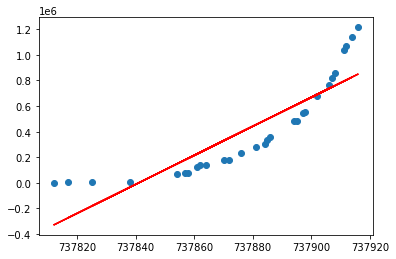

In [77]:
X=regresion['fecha']
y=regresion['dosis_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, 
                                                    test_size = 0.4, random_state = 100)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r')
plt.show()

In [81]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm) 

In [87]:
mesn = pd.Timestamp(year = 2022,  month = 5, day = 12) 
mes_predit=mesn
mesn=mesn.toordinal()

mesn_vacunados=(lr.params[0] + lr.params[1] * mesn)*10
print("Fecha predictiva en la que todos los ecuatorianos podrian estar vacunados de las 2 dosis: ",mes_predit,mesn_vacunados)

Fecha predictiva en la que todos los ecuatorianos podrian estar vacunados de las 2 dosis:  2022-05-12 00:00:00 50528331.40497208


# Comparación con otros países

In [97]:
df_argentina = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Argentina.csv')
df_argentina = df_argentina[['date','total_vaccinations','people_vaccinated','people_fully_vaccinated']]
df_argentina = df_argentina.fillna(0)
df_argentina

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-12-29,700,0.0,0.0
1,2020-12-31,32013,0.0,0.0
2,2021-01-04,39599,0.0,0.0
3,2021-01-08,107542,0.0,0.0
4,2021-01-13,166833,0.0,0.0
...,...,...,...,...
109,2021-05-07,8820691,7555386.0,1265305.0
110,2021-05-08,9001747,7660652.0,1341095.0
111,2021-05-09,9082597,7688877.0,1393720.0
112,2021-05-10,9122759,7718272.0,1404487.0


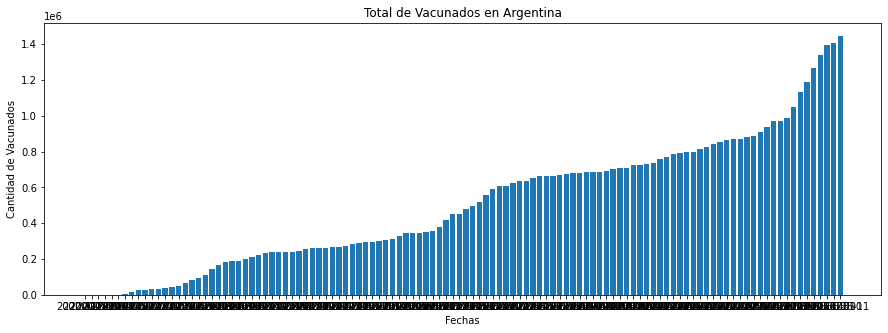

In [100]:
fechas=df_argentina['date']
cantidad=df_argentina['people_fully_vaccinated']
plt.figure(figsize=(15, 5))
plt.xlabel("Fechas")
plt.ylabel("Cantidad de Vacunados")
plt.title('Total de Vacunados en Argentina')
plt.bar(fechas,cantidad)
plt.show()

In [101]:
df_francia = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/France.csv')
df_francia = df_francia[['date','total_vaccinations','people_vaccinated','people_fully_vaccinated']]
df_francia= df_francia.fillna(0)
df_francia

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-12-27,20,20,0
1,2020-12-28,82,82,0
2,2020-12-29,190,190,0
3,2020-12-30,306,306,0
4,2020-12-31,389,389,0
...,...,...,...,...
130,2021-05-06,24580601,17183479,7488367
131,2021-05-07,25196861,17542317,7764439
132,2021-05-08,25448331,17726841,7833539
133,2021-05-09,25621942,17853667,7880929


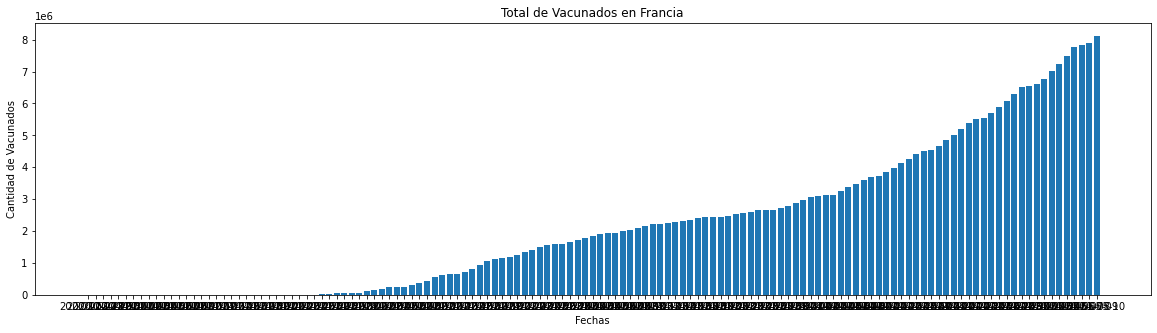

In [104]:
fechas=df_francia['date']
cantidad=df_francia['people_fully_vaccinated']
plt.figure(figsize=(20, 5))
plt.xlabel("Fechas")
plt.ylabel("Cantidad de Vacunados")
plt.title('Total de Vacunados en Francia')
plt.bar(fechas,cantidad)
plt.show()

# 